# Marketing Campaigns

### Problem objective: 
As a data scientist, you must conduct exploratory data analysis and hypothesis testing 
to enhance your comprehension of the diverse factors influencing customer acquisition. 

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('marketing_data.csv')     # importing data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.shape

(2240, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking if there are any missing values in each column of the table.

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

 - The dataframe's 'Income' column is the only one with 24 missing values out of its 28 columns. Therefore, we have to either add the missing data to the table or remove it.
 - It is preferable to compute the average depending on the individuals' marital status and level of education in order to fill in the missing income numbers.

In [11]:
df.columns         # printing the column names of the tabel

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

#### It is found that there is space infront & back of the ' Income ' column name, so for ease of use the column name has been changed to 'Income' by removing the spaces.

In [13]:
# rename() function has been used to rename the ' Income ' column name to 'Income'

In [14]:
df=df.rename(columns={' Income ':'Income'})

In [15]:
df.columns   # Checking the column names. 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

#### Income column is of type object. So, to apply any mathematical function to them, it needs to be either of type int or float. Also, there are '$' and ',' in the Income column. So we need to remove the symbols first to convert them to type float.

In [17]:
df['Income']=df['Income'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [18]:
df.Income.dtypes   # checking if the Income is converted as float.

dtype('float64')

In [19]:
g1=df[df['Income'].isnull()]     # Checking the NAN income values.
g1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


#### List of unique values in Education column, whose Income is NaN.

In [21]:
unique_ed=df[df['Income'].isnull()]
unique_ed['Education'].unique()

array(['PhD', 'Graduation', '2n Cycle', 'Master'], dtype=object)

#### Before filling the NAN values, its better to check for outliers in the data using scatter plot with relevant details in X & Y axis.

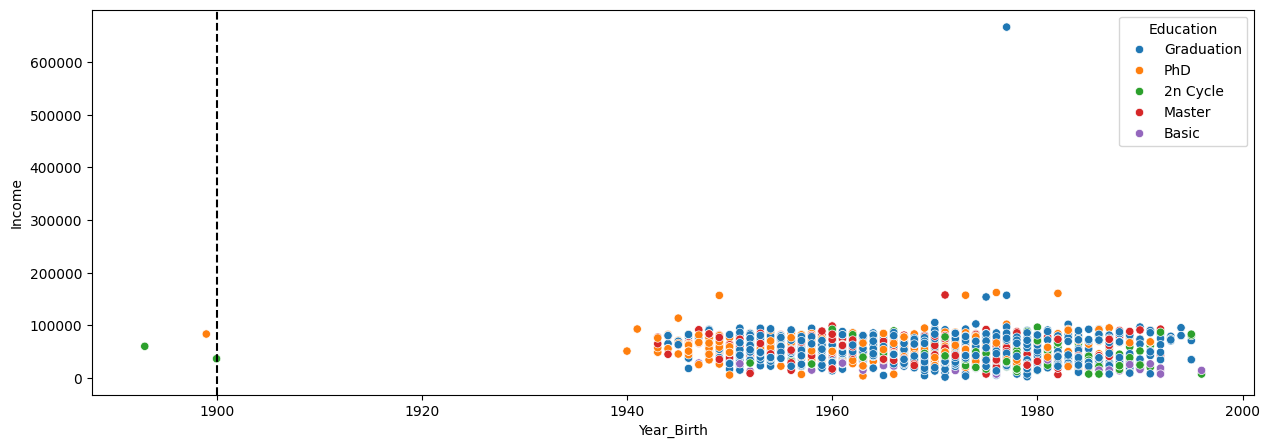

In [23]:
plt.figure(figsize=(15,5))      
sns.scatterplot(data=df,x='Year_Birth',y='Income',hue="Education")     # X-axis: Year_birth, Y-axis: Income
plt.axvline(color='black',x=1900,linestyle='--')

 - A vertical line at 1900 is drawn because, the posibility of the person living over 110 years is very less, and they act as potential outliers in the data. So  its better to remove them.

In [25]:
df[df.Year_Birth<=1900]  # To check how many people are there

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,...,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,...,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,...,2,5,0,0,0,0,0,0,1,IND


 - There are 3 people who are born on or before 1900. So they have to be removed from the data.

In [27]:
df= df[df['Year_Birth']>1900]   # Removing the outliers from the dataset.

### To calculate the average of each Education type based on their marital status and replace it with the NaN values in 'Income' column

In [29]:
# Calculate the mean Income for each Education and Marital_Status group
group_means = df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')

# Fill missing Income values with the corresponding group mean
df['Income'] = df['Income'].fillna(group_means)

### Create variables to represent the total number of children, age, and total spending. Derive the total purchases from the number of transactions across the three channels. 

In [31]:
# Calculate the total number of children by summing the number of kids and teenagers in the household

df['total_children']=df['Kidhome']+df['Teenhome']

Text(0.5, 1.0, "% OF KID'S VS TEENS")

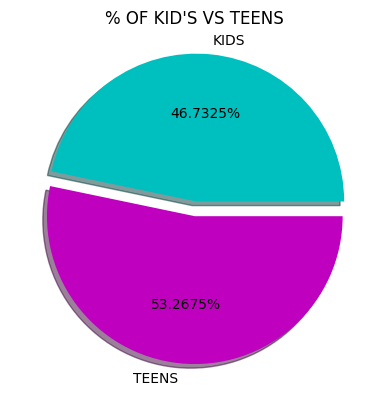

In [32]:
kid_teen=[df['Kidhome'].sum(),df['Teenhome'].sum()]

people=['KIDS','TEENS']
cols = ['c','m']

plt.pie(kid_teen,
        labels=people,
        colors=cols,
        shadow= True,
        explode=(0.1,0),  
        autopct='%1.4f%%')  

plt.title("% OF KID'S VS TEENS")

In [33]:
# Calculate the total spending by summing up all product category expenditures
# This includes spending on wines, fruits, meat products, fish products, sweet products, and gold products

 
df['Total_Spending'] = (
    df['MntWines'] +           # Amount spent on wines
    df['MntFruits'] +          # Amount spent on fruits
    df['MntMeatProducts'] +    # Amount spent on meat products
    df['MntFishProducts'] +    # Amount spent on fish products
    df['MntSweetProducts'] +   # Amount spent on sweet products
    df['MntGoldProds']         # Amount spent on gold products
)

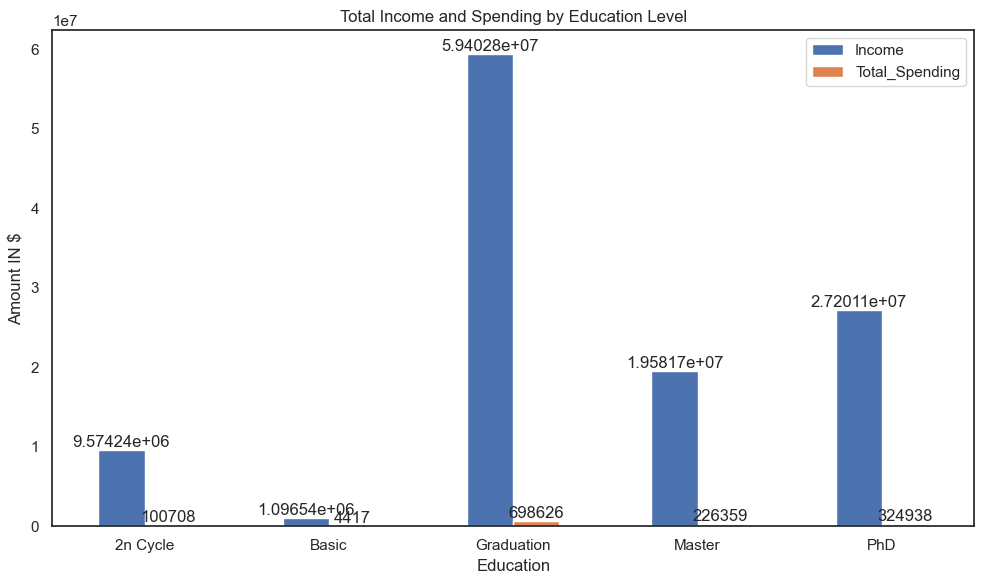

In [210]:
# Group by Education and calculate mean
grouped = df.groupby('Education')[['Income', 'Total_Spending']].sum()

# Plot side-by-side bars
ax=grouped.plot(kind='bar', figsize=(10, 6))  
plt.title('Total Income and Spending by Education Level')
plt.ylabel('Amount IN $')
plt.xticks(rotation=0)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - Based on their level of education, the graph shows the total income and expenses of all the people in the dataset.

Text(0.5, 1.0, '% of MONEY SPENT ON EACH PRODUCT IN TOTAL')

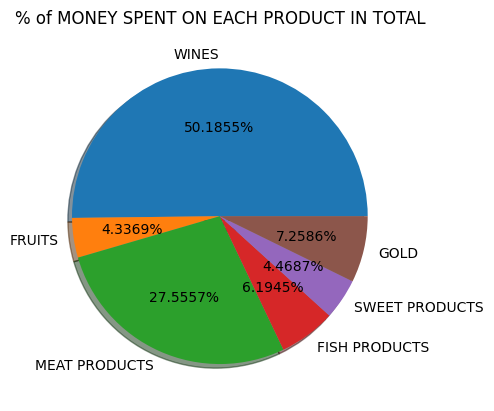

In [35]:
total_spending=[df['MntWines'].sum(),df['MntFruits'].sum(), df['MntMeatProducts'].sum(),df['MntFishProducts'].sum(),df['MntSweetProducts'].sum(), df['MntGoldProds'].sum()]
lab=['WINES','FRUITS','MEAT PRODUCTS','FISH PRODUCTS','SWEET PRODUCTS','GOLD']

plt.pie(total_spending,
        labels=lab,
        shadow=True,
        autopct='%1.4f%%')

plt.title('% of MONEY SPENT ON EACH PRODUCT IN TOTAL')


 - From the above graph, we can infer that about 50% of the money is spent on the "WINE".
   
 - Among animal products, "MEAT PRODUCTS" takes the first place with 27.557%, and "FISH PRODUCTS" takes the second place with just 6.194%. From this, we can say that people prefer meat products over fish products.

### THE AMOUNT SPENT ON EACH PRODUCT BASED ON THE COUNTRY AND THE LEVEL OF EDUCATION

#### WINE

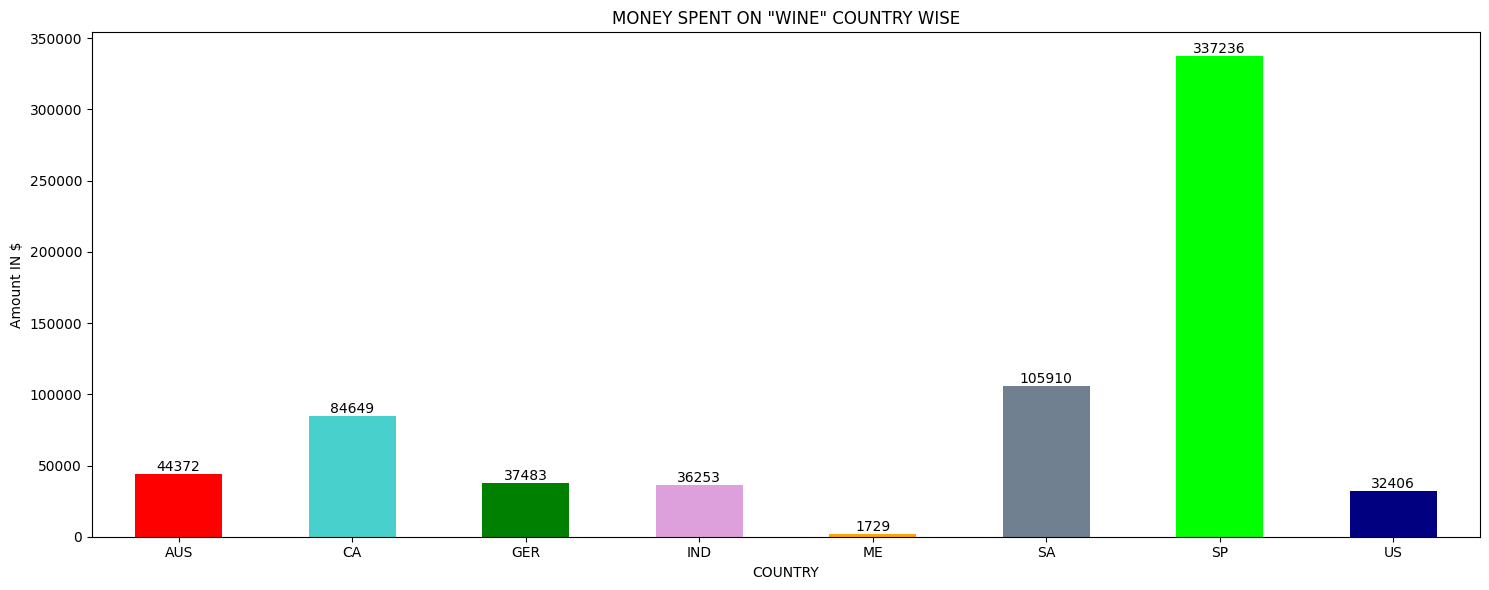

In [39]:
# Group data by country and sum the wine expenditure for each country
country_wine=df.groupby('Country')['MntWines'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']     # Define a list of colors for the bars


ax=country_wine.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot with the specified figure size and colors
plt.title('MONEY SPENT ON "WINE" COUNTRY WISE')
plt.ylabel('Amount IN $')
plt.xlabel('COUNTRY')
plt.xticks(rotation=0)     
plt.tight_layout()    

for container in ax.containers:     # Add value labels at the edge of each bar
    ax.bar_label(container, label_type='edge')

 - Spain spent more money on "WINE" than any other country, while the Middle East spent the least.
   
 - Due to their religious convictions, the Middle East spends less. Therefore, alcohol marketing in ME won't be as effective as in other nations. To boost sales, it is preferable to promote alcohol products in other nations.

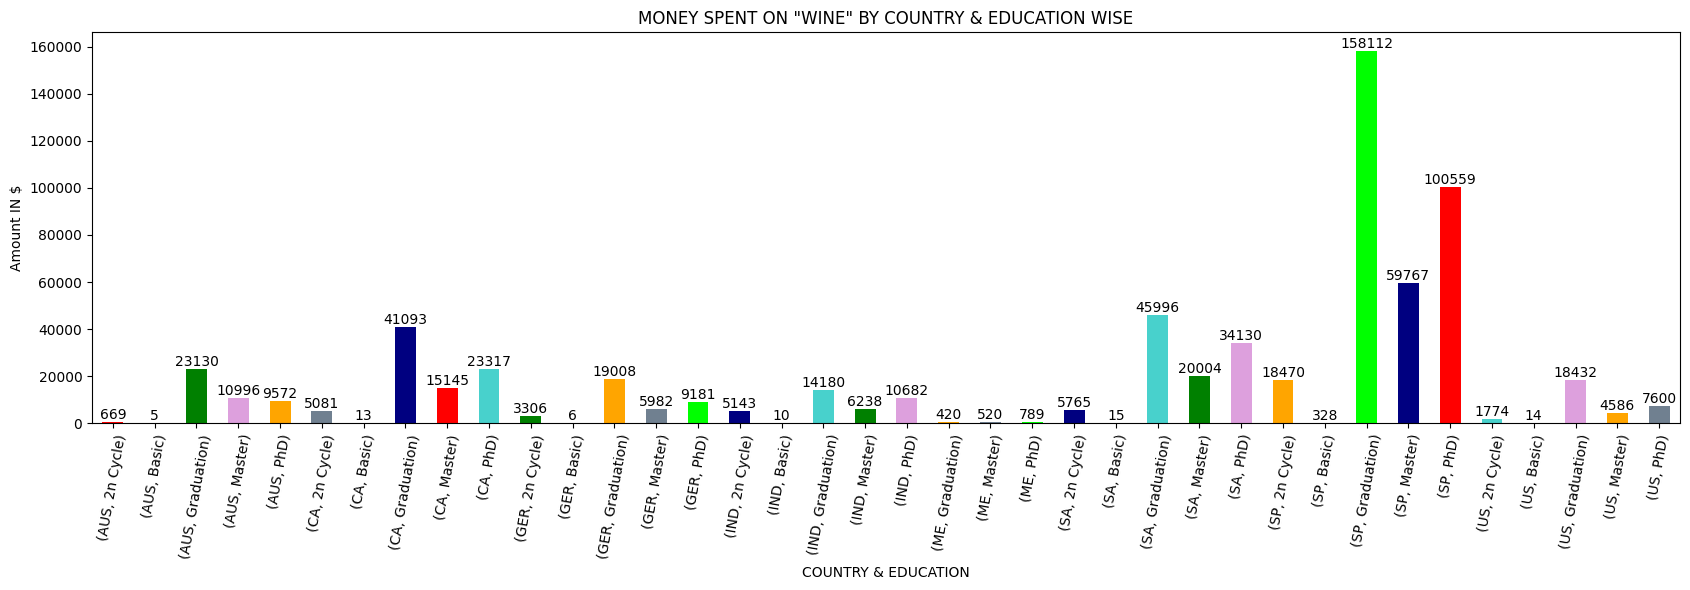

In [41]:
# Group data by Country and Education, then sum the MntWines column for each group
country_edu_wine=df.groupby(['Country','Education'])['MntWines'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']     


ax=country_edu_wine.plot(kind='bar', figsize=(17, 6),color=colors)    
plt.title('MONEY SPENT ON "WINE" BY COUNTRY & EDUCATION WISE')
plt.ylabel('Amount IN $')
plt.xlabel('COUNTRY & EDUCATION')
plt.xticks(rotation=80)     
plt.tight_layout()    

for container in ax.containers:     # Add value labels at the edge of each bar
    ax.bar_label(container, label_type='edge')

 - According to the graph above, wine purchases by graduates were higher than those by other educational levels in every country, with the exception of ME, where PhD holders purchased the most wine.

 - Those with a Basic education type purchased the least quantity of wine. Perhaps the best way to promote wine is to focus more on those with higher levels of education.

#### FRUITS

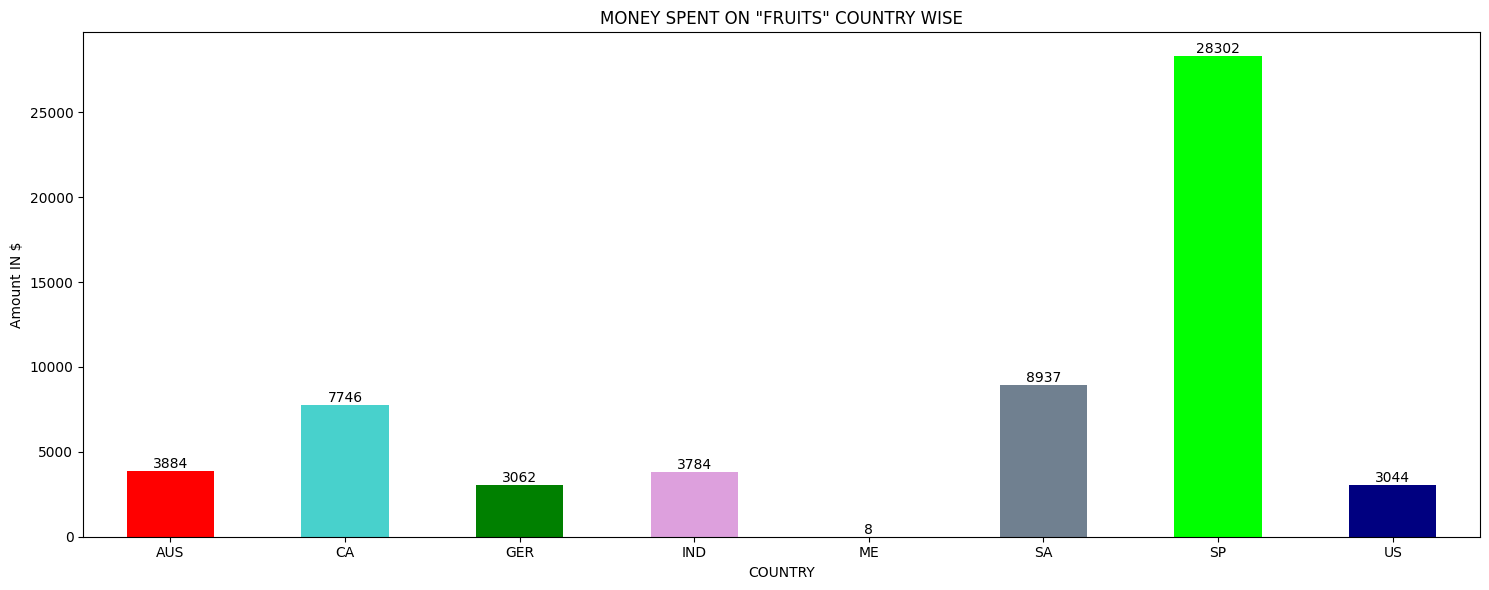

In [44]:
# Group data by country and sum the amount spent on fruits
country_fruits=df.groupby('Country')['MntFruits'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']

# Create a bar plot showing total fruit spending by country
ax=country_fruits.plot(kind='bar', figsize=(15, 6),color=colors)     
plt.title('MONEY SPENT ON "FRUITS" COUNTRY WISE')
plt.ylabel('Amount IN $')
plt.xlabel('COUNTRY')
plt.xticks(rotation=0)    
plt.tight_layout()         

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - Spain spent more money on "FRUITS" than any other country, while the Middle East spent the least.

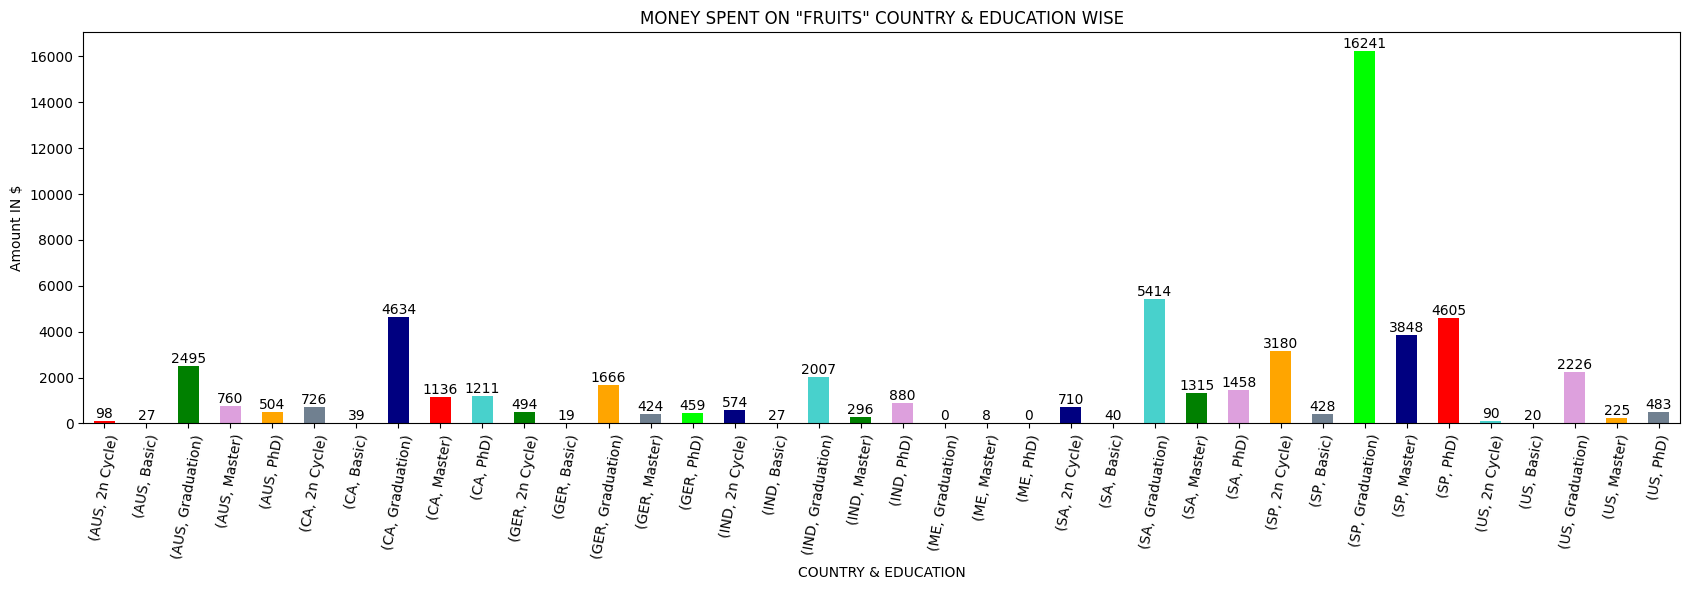

In [46]:
# Group data by Country and Education, then sum the MntFruits column for each group
country_edu_fruits=df.groupby(['Country','Education'])['MntFruits'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']

# Create a bar plot with specified figure size and colors
ax=country_edu_fruits.plot(kind='bar', figsize=(17, 6),color=colors)     
plt.title('MONEY SPENT ON "FRUITS" COUNTRY & EDUCATION WISE')
plt.ylabel('Amount IN $')
plt.xlabel('COUNTRY & EDUCATION')
plt.xticks(rotation=80)    
plt.tight_layout()     

# Add value labels at the edge of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - Compared to those with other forms of education, those with "graduation" as education spend the most on fruits. 

 - The people who bought the fewest fruits were those with a basic education. More promotion needs to be given to those with only a basic education.  

### MEAT PRODUCTS

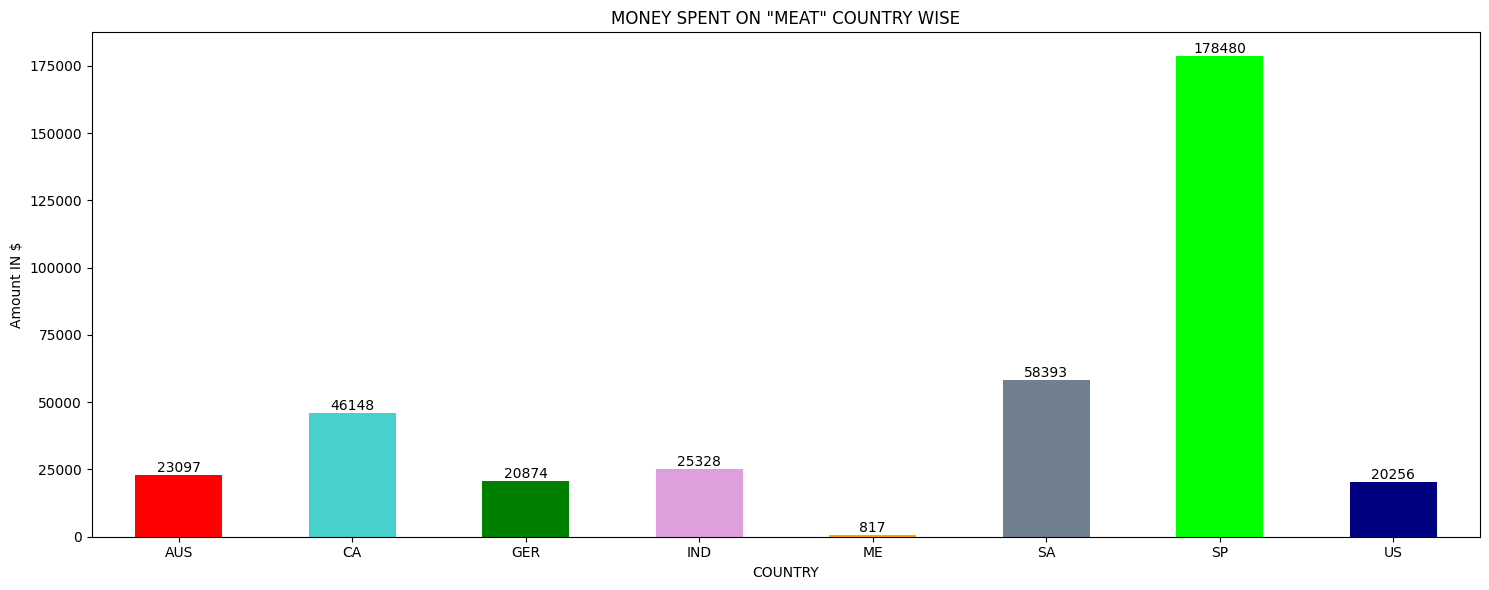

In [49]:
# Group data by country and sum the meat product purchases
country_meat=df.groupby('Country')['MntMeatProducts'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']


ax=country_meat.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot showing meat product spending by country
plt.title('MONEY SPENT ON "MEAT" COUNTRY WISE')  
plt.ylabel('Amount IN $')  
plt.xlabel('COUNTRY')  
plt.xticks(rotation=0)     
plt.tight_layout()         

# Add value labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - Spain spent more than any other nation on meat goods.

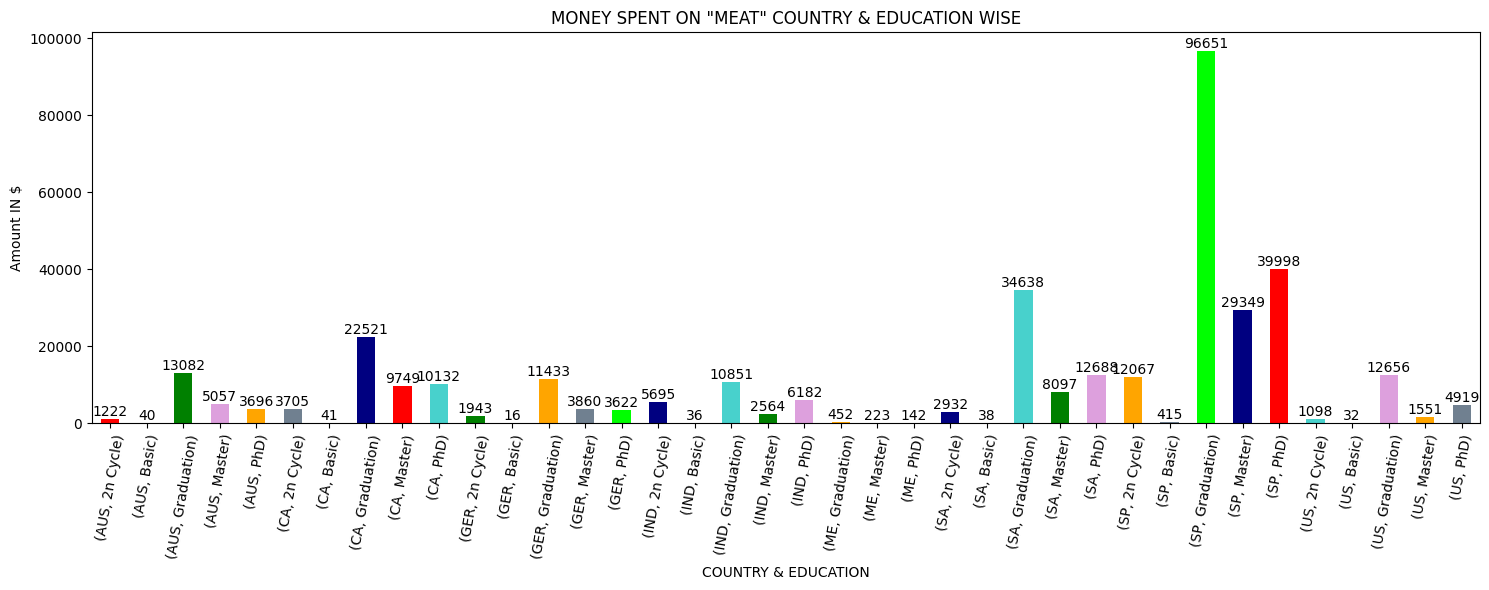

In [51]:
# Group data by Country and Education, then sum the MntMeatProducts column
country_edu_meat=df.groupby(['Country','Education'])['MntMeatProducts'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']


ax=country_edu_meat.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot with specified figure size and colors
plt.title('MONEY SPENT ON "MEAT" COUNTRY & EDUCATION WISE')  
plt.ylabel('Amount IN $')  
plt.xlabel('COUNTRY & EDUCATION')  
plt.xticks(rotation=80)     
plt.tight_layout()         

# Add value labels at the edge of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

- Compared to those with other forms of education, those with "graduation" as education spend the most on meat. 

### FISH PRODUCTS

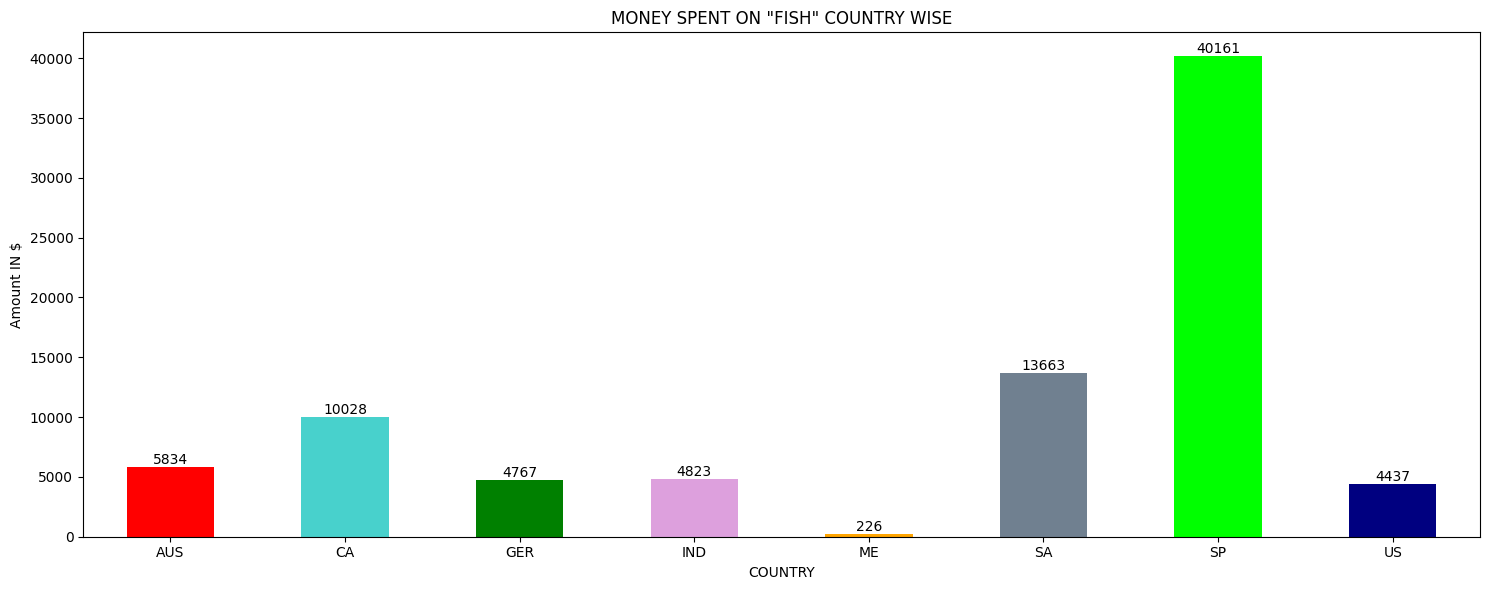

In [54]:
# Group data by country and sum the amount spent on fish products
country_fish=df.groupby('Country')['MntFishProducts'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']

ax=country_fish.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot showing fish product spending by country
plt.title('MONEY SPENT ON "FISH" COUNTRY WISE')  
plt.ylabel('Amount IN $')  
plt.xlabel('COUNTRY')      
plt.xticks(rotation=0)     
plt.tight_layout()        

# Add value labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - Spain spent more than any other nation on fish goods.

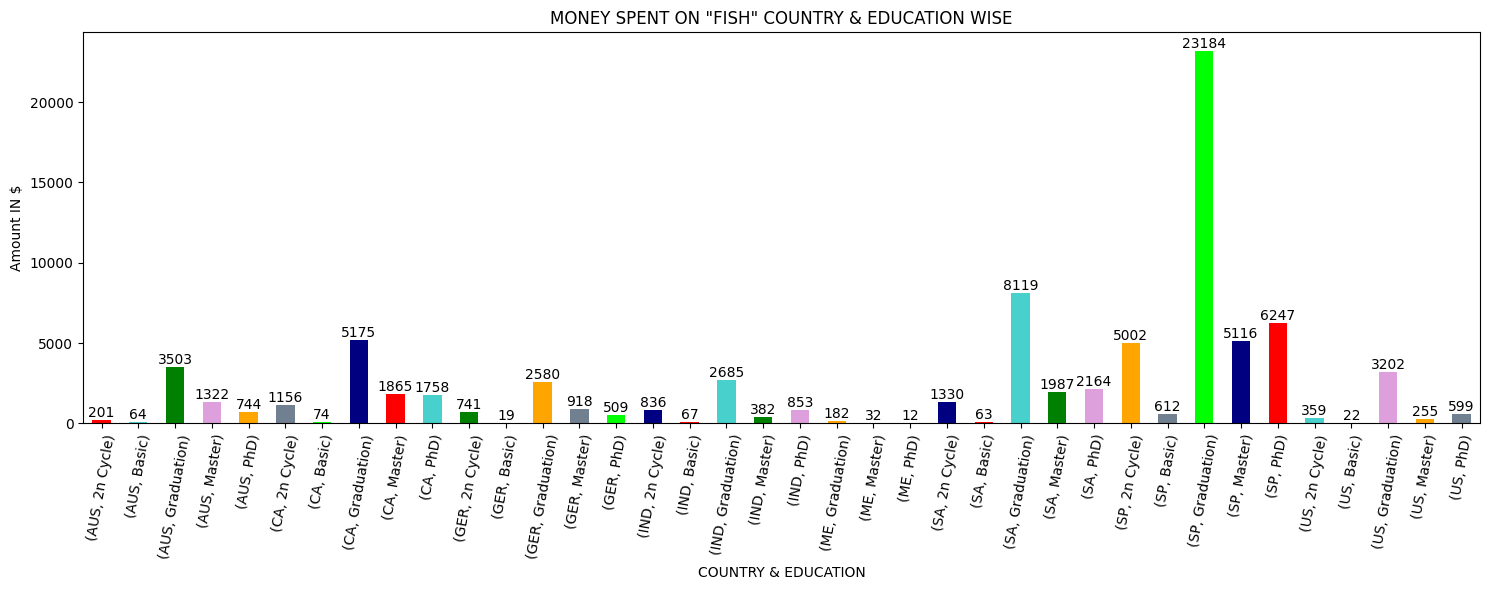

In [56]:
# Group data by Country and Education, then sum the fish product spending for each group
country_edu_fish=df.groupby(['Country','Education'])['MntFishProducts'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']


ax=country_edu_fish.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot showing fish product spending by country and education level
plt.title('MONEY SPENT ON "FISH" COUNTRY & EDUCATION WISE')  
plt.ylabel('Amount IN $')  
plt.xlabel('COUNTRY & EDUCATION')  
plt.xticks(rotation=80)     
plt.tight_layout()          


# Add value labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

- Compared to those with other forms of education, those with "graduation" as education spend the most on fish. 

### SWEET PRODUCTS

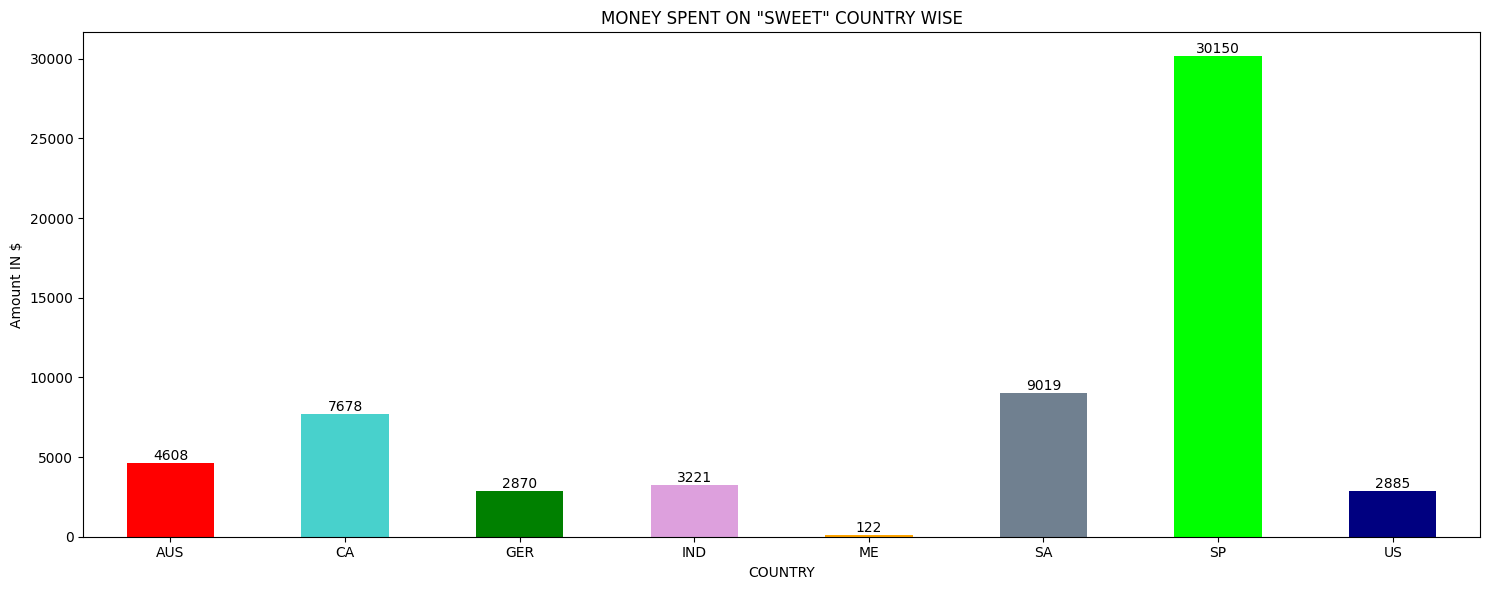

In [59]:
# Group data by country and sum the amount spent on sweet products
country_sweet=df.groupby('Country')['MntSweetProducts'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']


ax=country_sweet.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot showing sweet product spending by country
plt.title('MONEY SPENT ON "SWEET" COUNTRY WISE')  
plt.ylabel('Amount IN $')  
plt.xlabel('COUNTRY')      
plt.xticks(rotation=0)     
plt.tight_layout()         

# Add value labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - Spain spent more than any other nation on sweet products.

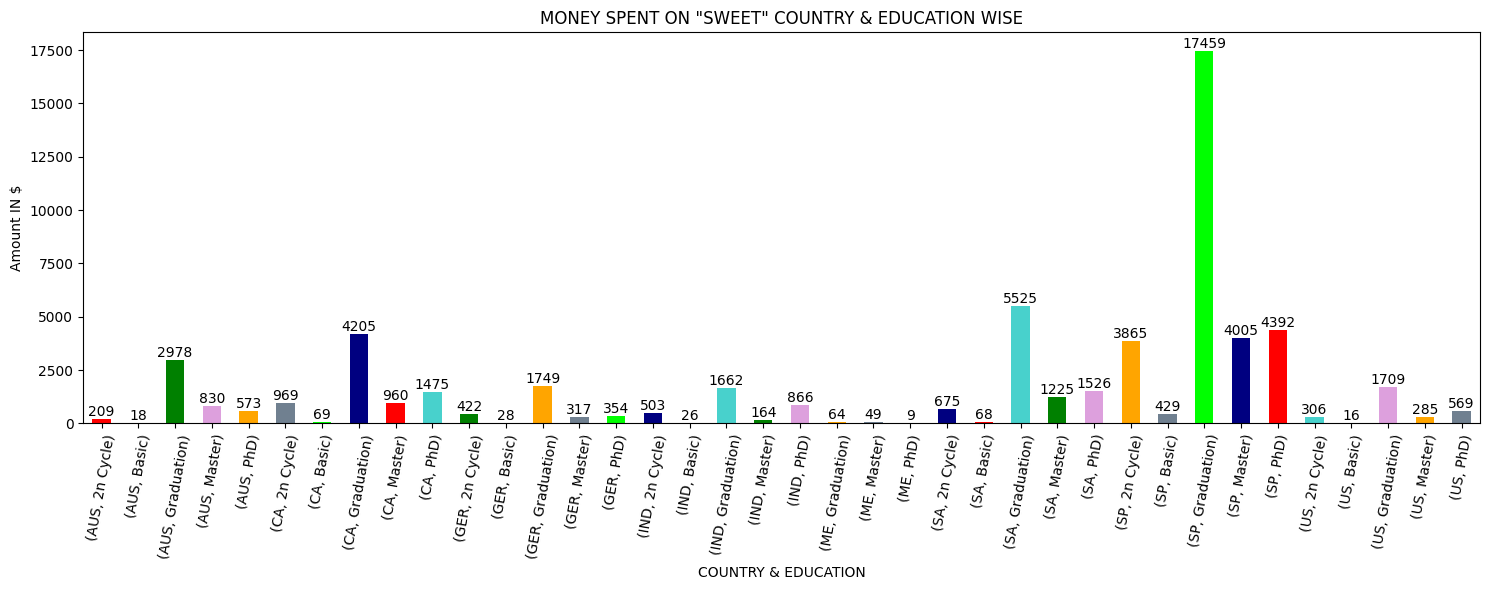

In [61]:
country_edu_sweet=df.groupby(['Country','Education'])['MntSweetProducts'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']


ax=country_edu_sweet.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot showing fish product spending by country and education level
plt.title('MONEY SPENT ON "SWEET" COUNTRY & EDUCATION WISE')  
plt.ylabel('Amount IN $')  
plt.xlabel('COUNTRY & EDUCATION')
plt.xticks(rotation=80)     
plt.tight_layout()          


# Add value labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

- Compared to those with other forms of education, those with "graduation" as education spend the most on sweet. 

### GOLD PRODUCTS

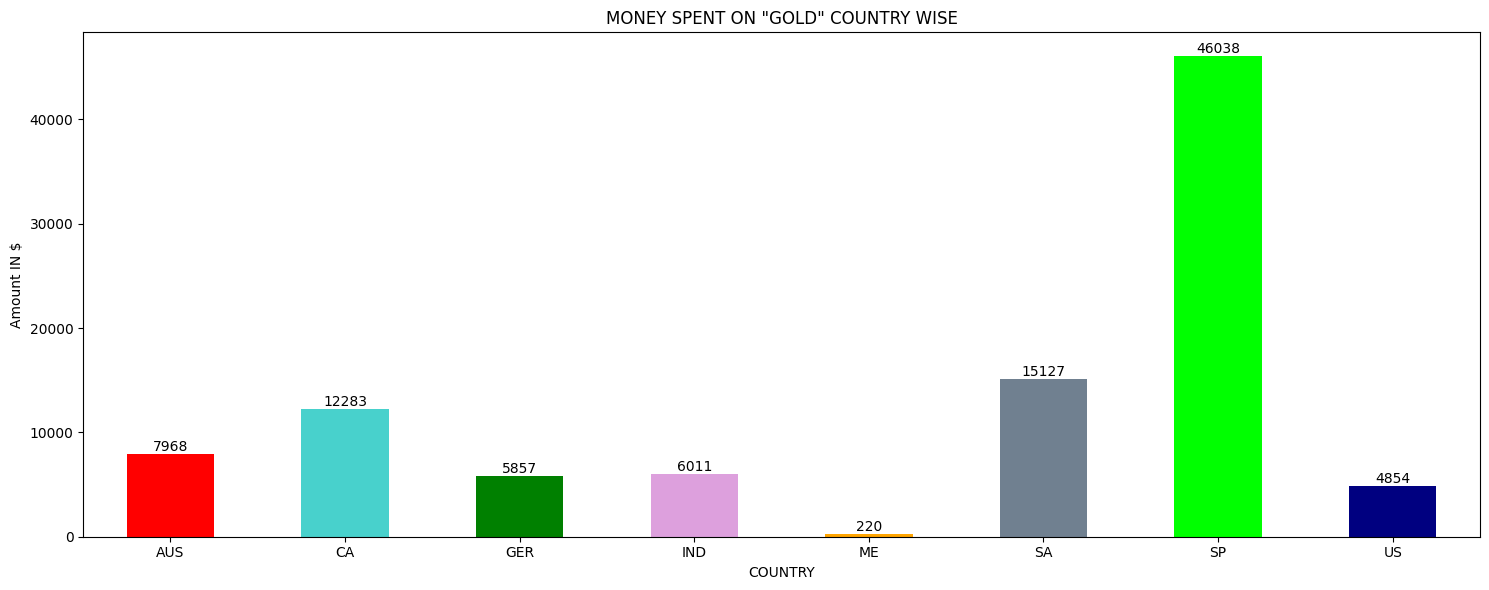

In [64]:
# Group data by country and sum the gold product spending for each country
country_gold=df.groupby('Country')['MntGoldProds'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']


ax=country_gold.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot showing gold product spending by country
plt.title('MONEY SPENT ON "GOLD" COUNTRY WISE')  
plt.ylabel('Amount IN $')                        
plt.xlabel('COUNTRY')                           
plt.xticks(rotation=0)                           
plt.tight_layout()                               

# Add value labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - Spain spent more than any other nation on gold products.

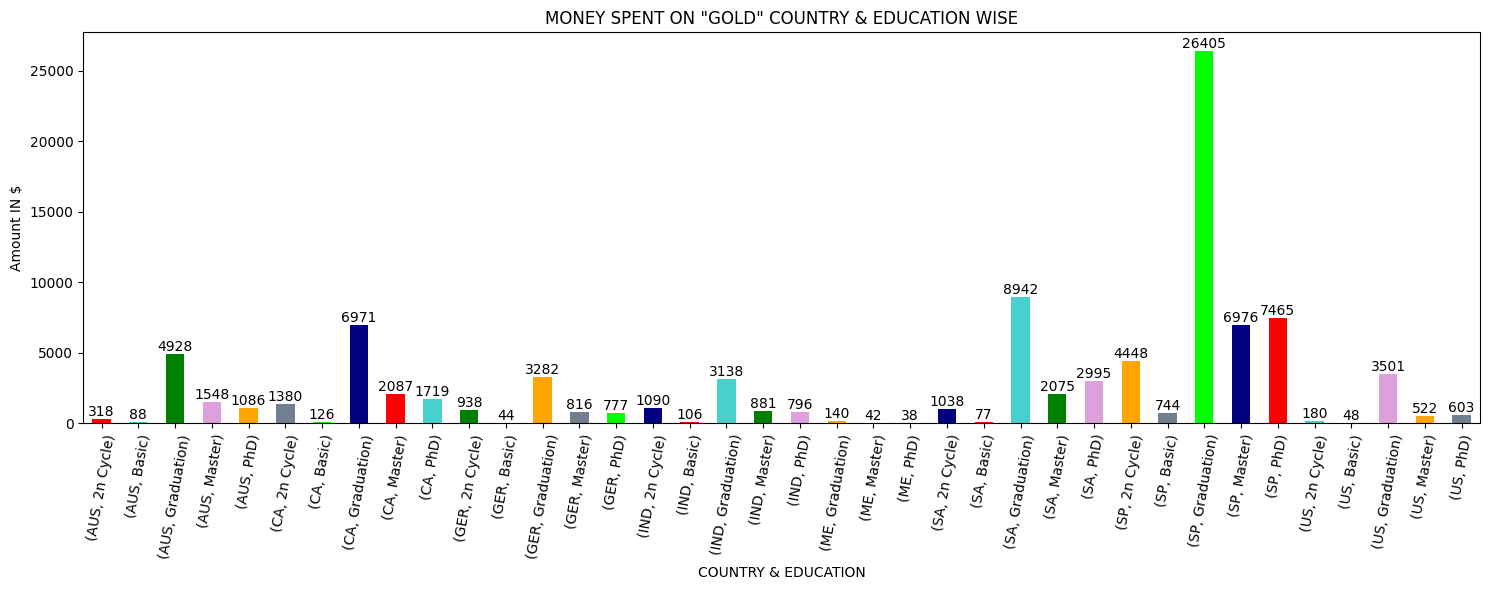

In [66]:
# Group data by Country and Education, then sum the MntGoldProds column for each group
country_edu_gold=df.groupby(['Country','Education'])['MntGoldProds'].sum()
colors = ['red', 'mediumturquoise', 'green', 'plum', 'orange', 'slategray', 'lime', 'navy']


ax=country_edu_gold.plot(kind='bar', figsize=(15, 6),color=colors)     # Create a bar plot with the grouped data
plt.title('MONEY SPENT ON "GOLD" COUNTRY & EDUCATION WISE')  
plt.ylabel('Amount IN $') 
plt.xlabel('COUNTRY & EDUCATION')  
plt.xticks(rotation=80)  
plt.tight_layout()  

# Add value labels at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # Add labels at the edge of each bar

- Compared to those with other forms of education, those with "graduation" as education spend the most on gold. 

## 4. Generate box plots and histograms to gain insights into the distributions

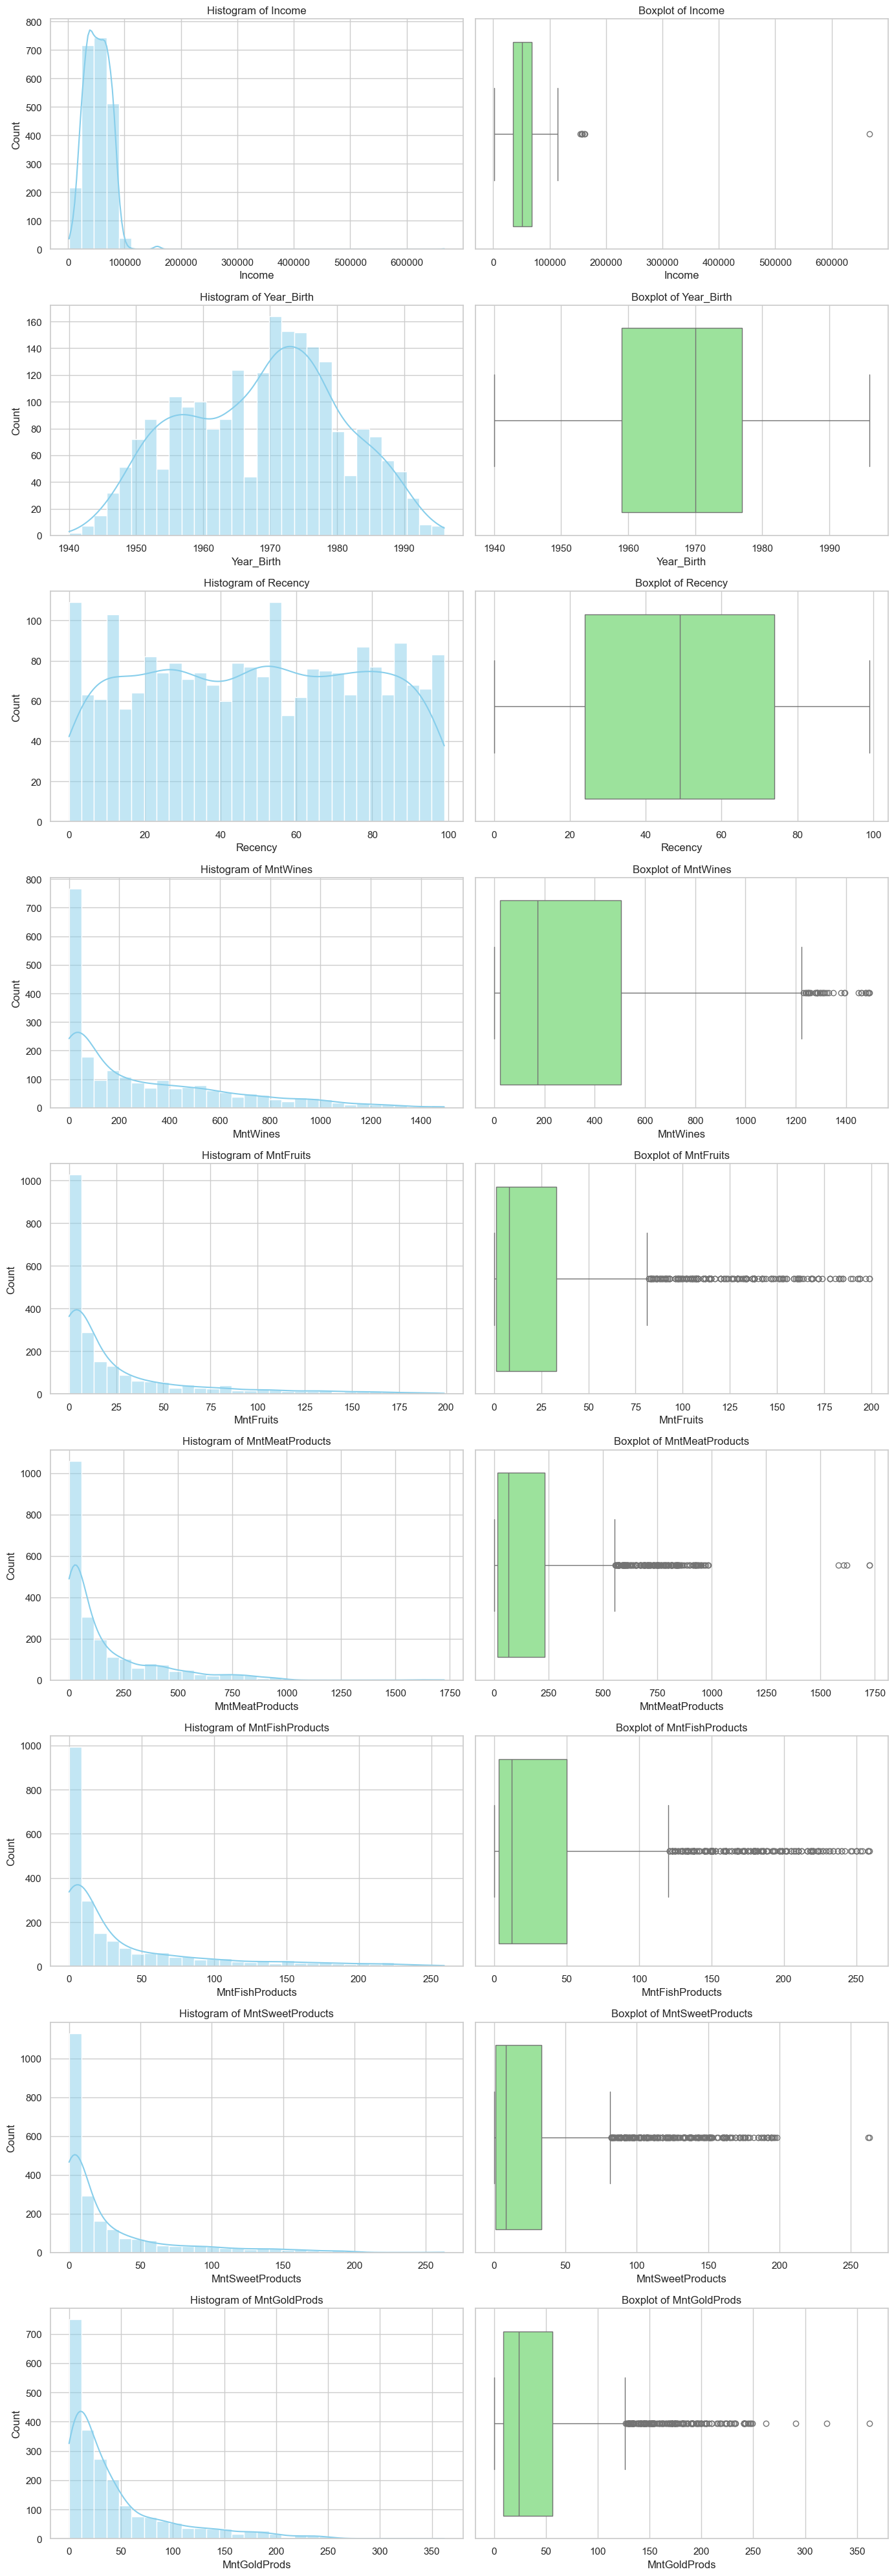

In [69]:
# Set the visual style for the plots to "whitegrid"
sns.set(style="whitegrid")

# Define a list of numerical columns to analyze
num_cols = ['Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a figure with subplots - two plots for each numerical column (histogram and boxplot)
fig, axes = plt.subplots(len(num_cols), 2, figsize=(14, 40))

# Loop through each numerical column to create visualizations
for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0], bins=30, color='skyblue')     # Create a histogram with kernel density estimate for the current column
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightgreen')     # Create a boxplot for the current column
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()

## 5. Apply ordinal and one-hot encoding based on the various types of categorical variables

#### ORDINAL

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
OE=OrdinalEncoder()

In [74]:
# Create a copy of the original dataframe to work with
df_ordinal=df.copy()

# Transform the 'Education' column using Ordinal Encoding
# This converts categorical education levels to numeric values based on their ordinal relationship
df_ordinal[['Education']]=OE.fit_transform(df_ordinal[['Education']])

In [75]:
df_ordinal

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_children,Total_Spending
0,1826,1970,2.0,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,0,1,0,SP,0,1190
1,1,1961,2.0,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,0,577
2,10476,1958,2.0,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,0,US,1,251
3,1386,1967,2.0,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,0,0,AUS,2,11
4,5371,1989,2.0,Single,21474.0,1,0,4/8/14,0,6,...,1,0,0,0,0,1,0,SP,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,4.0,Divorced,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,0,0,0,US,1,689
2236,5263,1977,0.0,Married,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,0,0,0,SP,1,55
2237,22,1976,2.0,Divorced,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,0,0,0,SP,1,309
2238,528,1978,2.0,Married,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,0,0,0,IND,0,1383


 - The Education column uses ordinal encoding, which is valid and relevant as long as the categories have a natural, hierarchical order.

#### ONE HOT ENCODING

In [78]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
# Initialize a OneHotEncoder that:
# - Returns dense arrays instead of sparse matrices (sparse_output=False)
# - Ignores unknown categories during transform (handle_unknown='ignore')
# - Drops the first category of each feature to avoid multicollinearity (drop='first')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')

In [80]:
# One-hot encode categorical features: Education, Marital_Status, and Country
encoded_array = encoder.fit_transform(df[['Education', 'Marital_Status', 'Country']])

# Convert the encoded array to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Education', 'Marital_Status', 'Country']))

# Display the resulting encoded DataFrame
print(encoded_df)

      Education_Basic  Education_Graduation  Education_Master  Education_PhD  \
0                 0.0                   1.0               0.0            0.0   
1                 0.0                   1.0               0.0            0.0   
2                 0.0                   1.0               0.0            0.0   
3                 0.0                   1.0               0.0            0.0   
4                 0.0                   1.0               0.0            0.0   
...               ...                   ...               ...            ...   
2232              0.0                   0.0               0.0            1.0   
2233              0.0                   0.0               0.0            0.0   
2234              0.0                   1.0               0.0            0.0   
2235              0.0                   1.0               0.0            0.0   
2236              0.0                   0.0               0.0            1.0   

      Marital_Status_Alone  Marital_Sta

 - One-hot encoding is done to convert categorical variables into a numerical format that machine learning models can understand.
 
 - It creates binary columns for each category, enabling algorithms to process non-numeric data without assuming any order.

## 6. Generate a heatmap to illustrate the correlation between different pairs of variables.

Text(0.5, 1.0, 'Correlation Heatmap of Marketing Campaign Data')

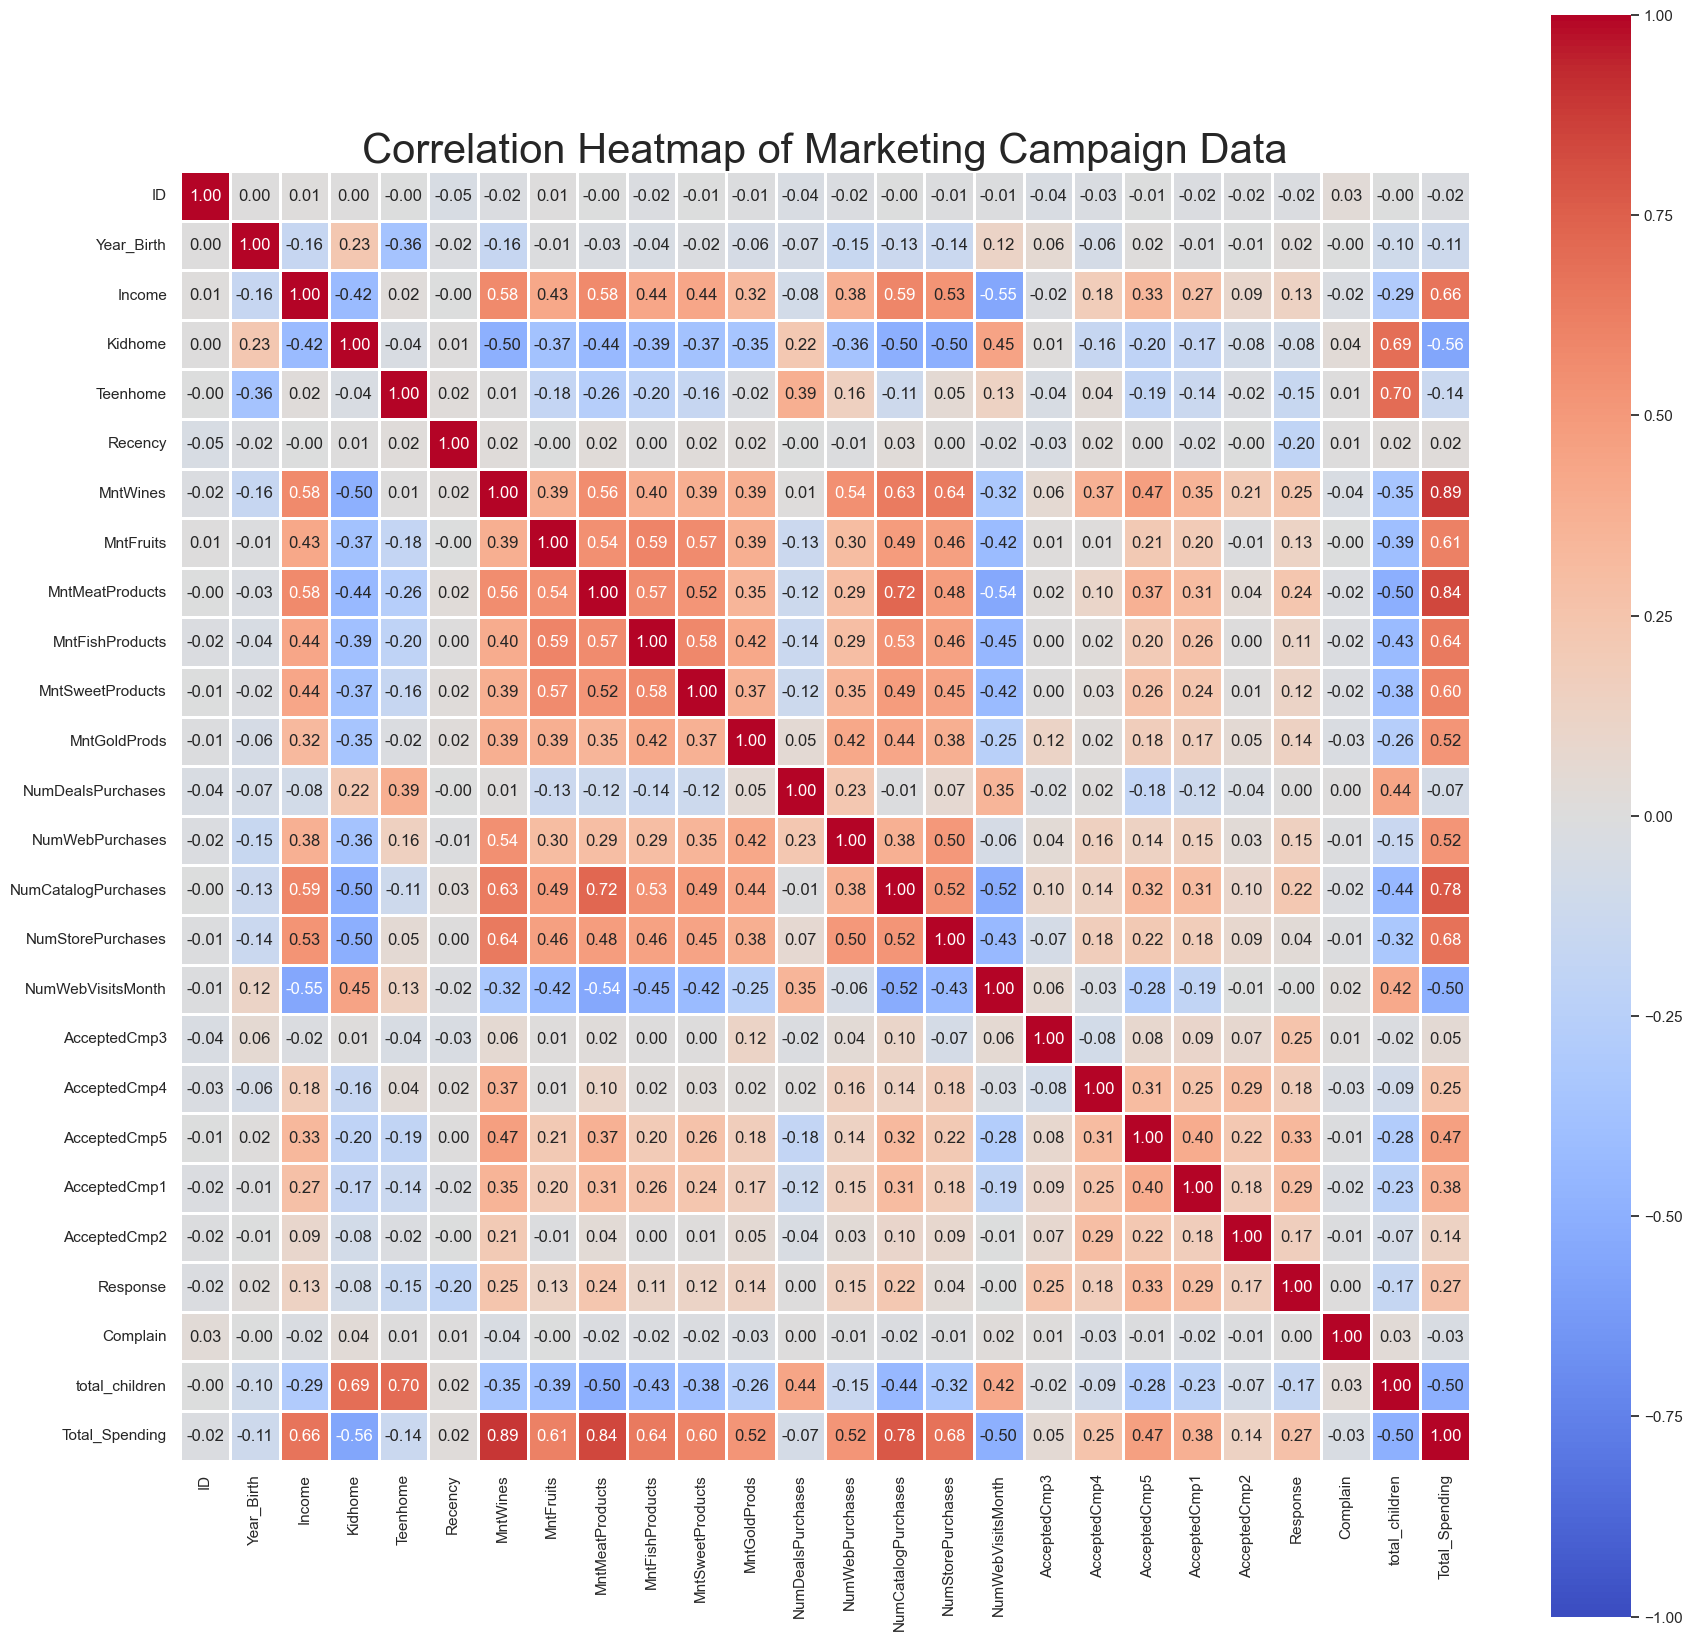

In [83]:
df_numeric = df.select_dtypes(include='number')     # Select only numeric columns from the dataframe for correlation analysis


corr = df_numeric.corr()     # Calculate the correlation matrix between all numeric variables
  

sns.set(style='white')     # Set the visual style to 'white' for a clean background


num_vars = len(corr.columns)     # Calculate the number of variables for sizing the plot
box_size = 0.8  # Size multiplier for each cell in the heatmap
plt.figure(figsize=(num_vars * box_size, num_vars * box_size))


sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.9, square=True,vmin=-1)     # Create a heatmap visualization of the correlation matrix


plt.title('Correlation Heatmap of Marketing Campaign Data', fontsize=30)

 - Darker blue = strong negative correlation (−1).
 - Darker red = strong positive correlation (+1).
 - White = no correlation (0).

Heatmaps are valuable for data exploration and visualization, allowing you to quickly identify patterns, correlations, and trends within your data. 

## 7. Test the following hypotheses: 

### Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences. 

In [87]:
df['Age']=2025-df.Year_Birth

NUMER OF PEOPLE OF AGE 50 AND ABOVE (OLDER PEOPLE): 1542
NUMBER OF OLDER PEOPLE PURCHASE FROM STORE: 1395



Text(0.5, 1.0, '% OF OLDER PEOPLE BUYING FROM STORE VS NOT BUYING FROM STORE')

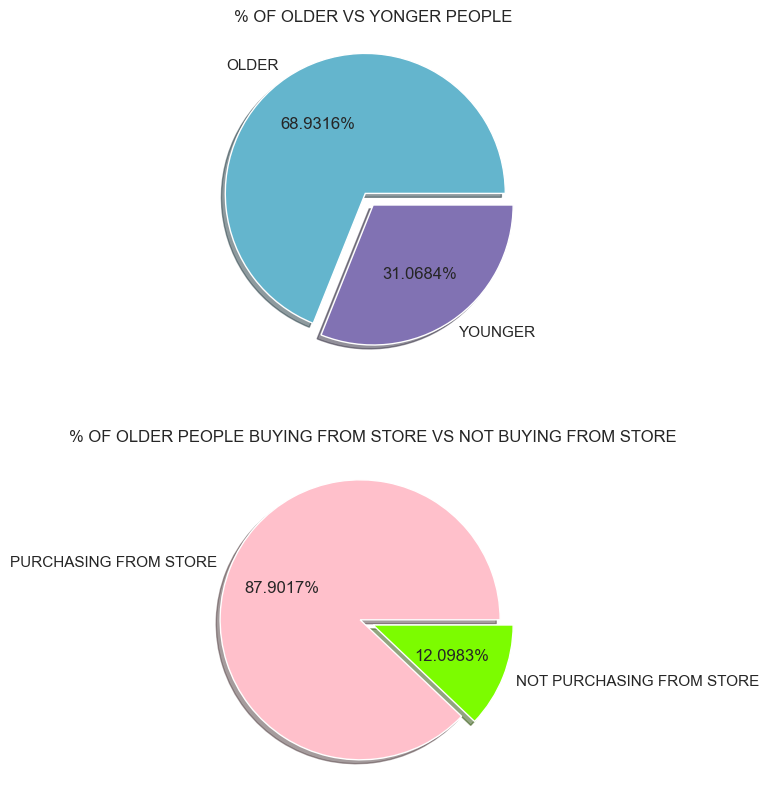

In [88]:
# Count the number of people aged 50 and above
count_older_people=(df['Age']>= 50).sum()

# Count the number of older people who made more than 2 store purchases
count_older_store=((df['Age']>=50) & (df['NumStorePurchases']>2)).sum()

# Count the number of older people who made more than 2 purchases in each channel (deals, web, catalog)
count_older_not_store=(((df['Age']>=50) & ((df['NumDealsPurchases']>2) & (df['NumWebPurchases']>2) & (df['NumCatalogPurchases']>2))).sum())

# Display the counts of older people and those who purchase from stores
print(f'NUMER OF PEOPLE OF AGE 50 AND ABOVE (OLDER PEOPLE): {count_older_people}')
print(f'NUMBER OF OLDER PEOPLE PURCHASE FROM STORE: {count_older_store}\n')

# Create a figure with 2 subplots arranged vertically, with size 10x10
fig, axis = plt.subplots(2,1,figsize=(10,10))


# Data for the first pie chart: older vs younger people
older_younger=[count_older_people,(df['Age']<50).sum()]
people=['OLDER','YOUNGER']
cols = ['c','m']

# Create the first pie chart showing age distribution
axis[0].pie(older_younger,
        labels=people,
        colors=cols,
        shadow= True,
        explode=(0.1,0),  
        autopct='%1.4f%%')  

axis[0].set_title("% OF OLDER VS YONGER PEOPLE")

# Data for the second pie chart: older people's store purchasing behavior
store_others=[count_older_store,count_older_not_store]
store=['PURCHASING FROM STORE', 'NOT PURCHASING FROM STORE']
color=['pink','lawngreen']

# Create the second pie chart showing store purchasing behavior of older people
axis[1].pie(store_others,
        labels=store,
        colors=color,
        shadow=True,
        explode=(0.1,0),  
        autopct='%1.4f%%')  

axis[1].set_title("% OF OLDER PEOPLE BUYING FROM STORE VS NOT BUYING FROM STORE")

- From the above pie chart, we can see what % people are older in the dataset.

- We can evaluate how older individuals still prefer traditional store shopping versus those who’ve adapted to other purchasing channels.

 - This analysis could guide targeted marketing: For example, if most older people don’t shop online, in-store promotions might work better for them. If many older customers are digitally active, then we can tailor online campaigns to that segment.

### Customers with children likely experience time constraints, making online shopping a more convenient option. 

Text(0.5, 1.0, 'TYPE OF PURCHASE DONE BY PEOPLE WHO HAVE 2 CHILDREN')

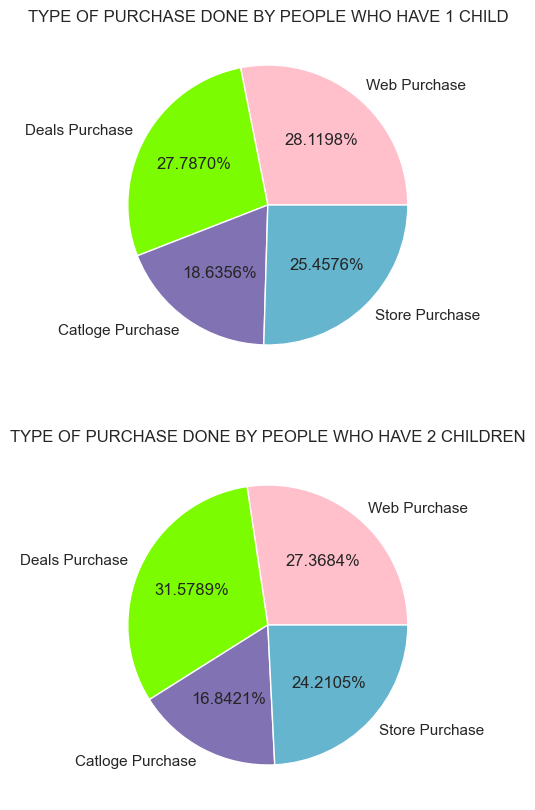

In [91]:
# Create a figure with 2 subplots arranged vertically, with size 10x10 inches
fig, axis=plt.subplots(2,1,figsize=(10,10))

# Calculate counts of different purchase types for customers with exactly 1 child
one_child_online=[(((df['Kidhome']==1) & df['NumWebPurchases']>0).sum()),
              (((df['Kidhome']==1) & df['NumDealsPurchases']>0).sum()),
              (((df['Kidhome']==1) & df['NumCatalogPurchases']>0).sum()),
              (((df['Kidhome']==1) & df['NumStorePurchases']>0).sum())]
label=['Web Purchase', 'Deals Purchase', 'Catloge Purchase', 'Store Purchase']
color=['pink','lawngreen','m','c']

# Create pie chart for customers with 1 child
axis[0].pie(one_child_online,
        labels=label,
        colors=color,
        autopct='%1.4f%%')  

axis[0].set_title('TYPE OF PURCHASE DONE BY PEOPLE WHO HAVE 1 CHILD')

# Calculate counts of different purchase types for customers with more than 1 child
two_child_online=[(((df['Kidhome']>1) & df['NumWebPurchases']>0).sum()),
              (((df['Kidhome']>1) & df['NumDealsPurchases']>0).sum()),
              (((df['Kidhome']>1) & df['NumCatalogPurchases']>0).sum()),
              (((df['Kidhome']>1) & df['NumStorePurchases']>0).sum())]
label=['Web Purchase', 'Deals Purchase', 'Catloge Purchase', 'Store Purchase']
color=['pink','lawngreen','m','c']

# Create pie chart for customers with 2 children
axis[1].pie(two_child_online,
        labels=label,
        colors=color,
        autopct='%1.4f%%')  

axis[1].set_title('TYPE OF PURCHASE DONE BY PEOPLE WHO HAVE 2 CHILDREN')

 - We may deduce from the pie chart above that parents prefer online shopping over in-store shopping, as it will be difficult for them to shop in-store with their kids, albeit the difference is not very great.
 - They also enjoy buying things at a discount, though. 

### Sales at physical stores may face the risk of cannibalization by alternative distribution channels. 

Text(0.5, 1.0, 'SALES DISTRIBUTION ACROSS VARIOUS PURCHASE MODE TYPES')

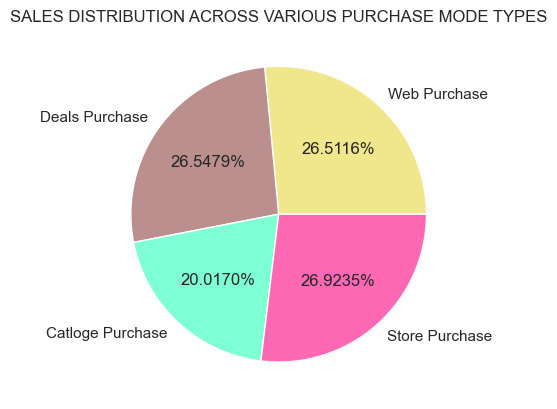

In [94]:
# Calculate the number of customers who made at least one purchase through each channel
sales_distribution=[((df['NumWebPurchases']>0).sum()),     # Count customers with web purchases
                    ((df['NumDealsPurchases']>0).sum()),   # Count customers with deals purchases
                    ((df['NumCatalogPurchases']>0).sum()), # Count customers with catalog purchases
                    ((df['NumStorePurchases']>0).sum())]   # Count customers with store purchases

label=['Web Purchase', 'Deals Purchase', 'Catloge Purchase', 'Store Purchase']
color=['khaki','rosybrown','aquamarine','hotpink']

# Create a pie chart showing distribution of purchase channels
plt.pie(sales_distribution,
        labels=label,
        colors=color,
        autopct='%1.4f%%')  


plt.title('SALES DISTRIBUTION ACROSS VARIOUS PURCHASE MODE TYPES')

 - We can conclude from the preceding data that there is little variation in-store, online, and deal purchases. While shop purchases are preferred by 0.4% more consumers, deals and online purchases are distributed equally.
 - People will definitely prefer to shop online in the future rather than in actual stores, which presents a serious danger to physical stores.

### Does the United States significantly outperform the rest of the world in total purchase volumes? 

In [97]:
df['Total_Purchase']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

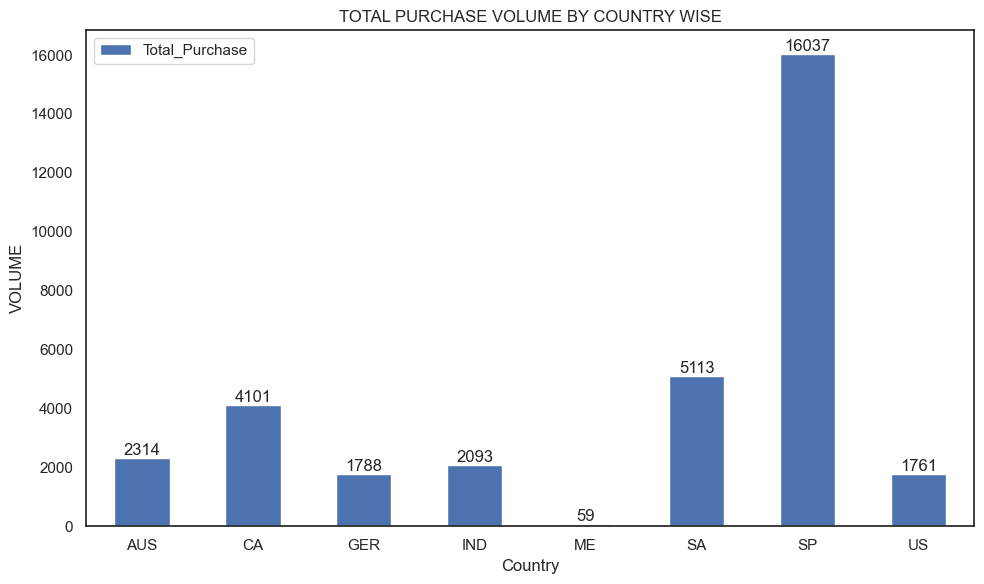

In [217]:
grouped = df.groupby('Country')[['Total_Purchase']].sum()

# Plot side-by-side bars
ax=grouped.plot(kind='bar', figsize=(10, 6))  
plt.title('TOTAL PURCHASE VOLUME BY COUNTRY WISE')
plt.ylabel('VOLUME')
plt.xticks(rotation=0)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - We may conclude from the bar graph above that, in terms of purchase volume, the US is not at the top of the list.
 - We are unable to determine the overall purchase volume by nation since the data from each country varies; some have less than ten, while others have more than a thousand, and others have between 100 and 150. Therefore, combining data by country does not allow us to draw many conclusions. It wouldn't be appropriate. 

## 8. Use appropriate visualization to help analyze the following:

### Identify the top-performing products and those with the lowest revenue. 

Text(0.5, 1.0, '% of MONEY SPENT ON EACH PRODUCT IN TOTAL')

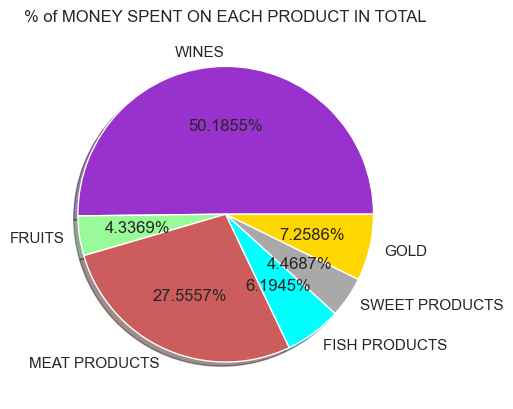

In [102]:
total_spending=[df['MntWines'].sum(),df['MntFruits'].sum(), df['MntMeatProducts'].sum(),df['MntFishProducts'].sum(),df['MntSweetProducts'].sum(), df['MntGoldProds'].sum()]
lab=['WINES','FRUITS','MEAT PRODUCTS','FISH PRODUCTS','SWEET PRODUCTS','GOLD']
color=['darkorchid','palegreen','indianred','cyan','darkgray','gold']

plt.pie(total_spending,
        labels=lab,
        colors=color,
        shadow=True,
        autopct='%1.4f%%')

plt.title('% of MONEY SPENT ON EACH PRODUCT IN TOTAL')


 - We can infer from the pie chart that consumers are spending less on fruits and sweets and more on wines.

### Examine if there is a correlation between customers' age and the acceptance rate of the last campaign. 

Text(0.5, 1.0, 'Customized Histogram with Density Plot for "Response"')

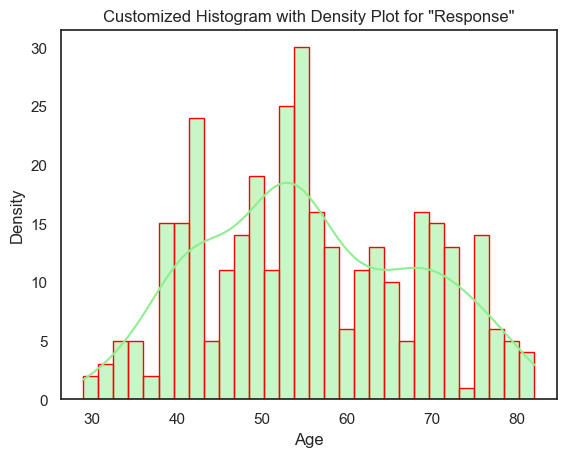

In [222]:
# Filter the DataFrame to get ages where Response == 1 and Age > 0
age_response = df[(df['Age'] > 0) & (df['Response'] == 1)]['Age']

# Plot the histogram with KDE
sns.histplot(age_response, bins=30, kde=True, color='lightgreen', edgecolor='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Customized Histogram with Density Plot for "Response"')

- Older people accepted from the last campaign. While some younger people did accept in the last campaign.

### Determine the country with the highest number of customers who accepted the last campaign.

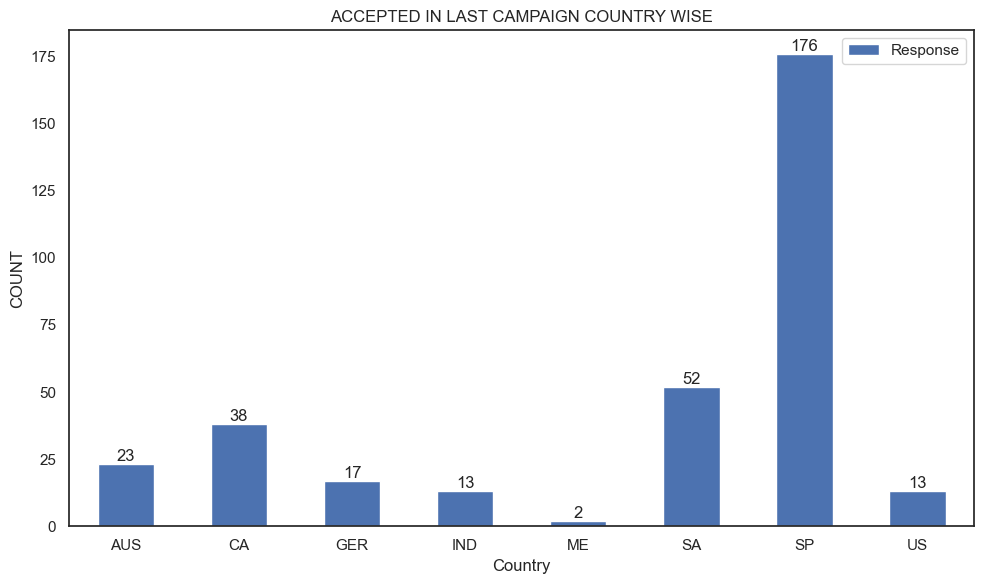

In [225]:
grouped = df.groupby('Country')[['Response']].sum()

# Plot side-by-side bars
ax=grouped.plot(kind='bar', figsize=(10, 6))  
plt.title('ACCEPTED IN LAST CAMPAIGN COUNTRY WISE')
plt.xticks(rotation=0)
plt.ylabel('COUNT')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - The majority of the last campaign's buyers were from Spain. 

### Investigate if there is a discernible pattern in the number of children at home and the total expenditure. 

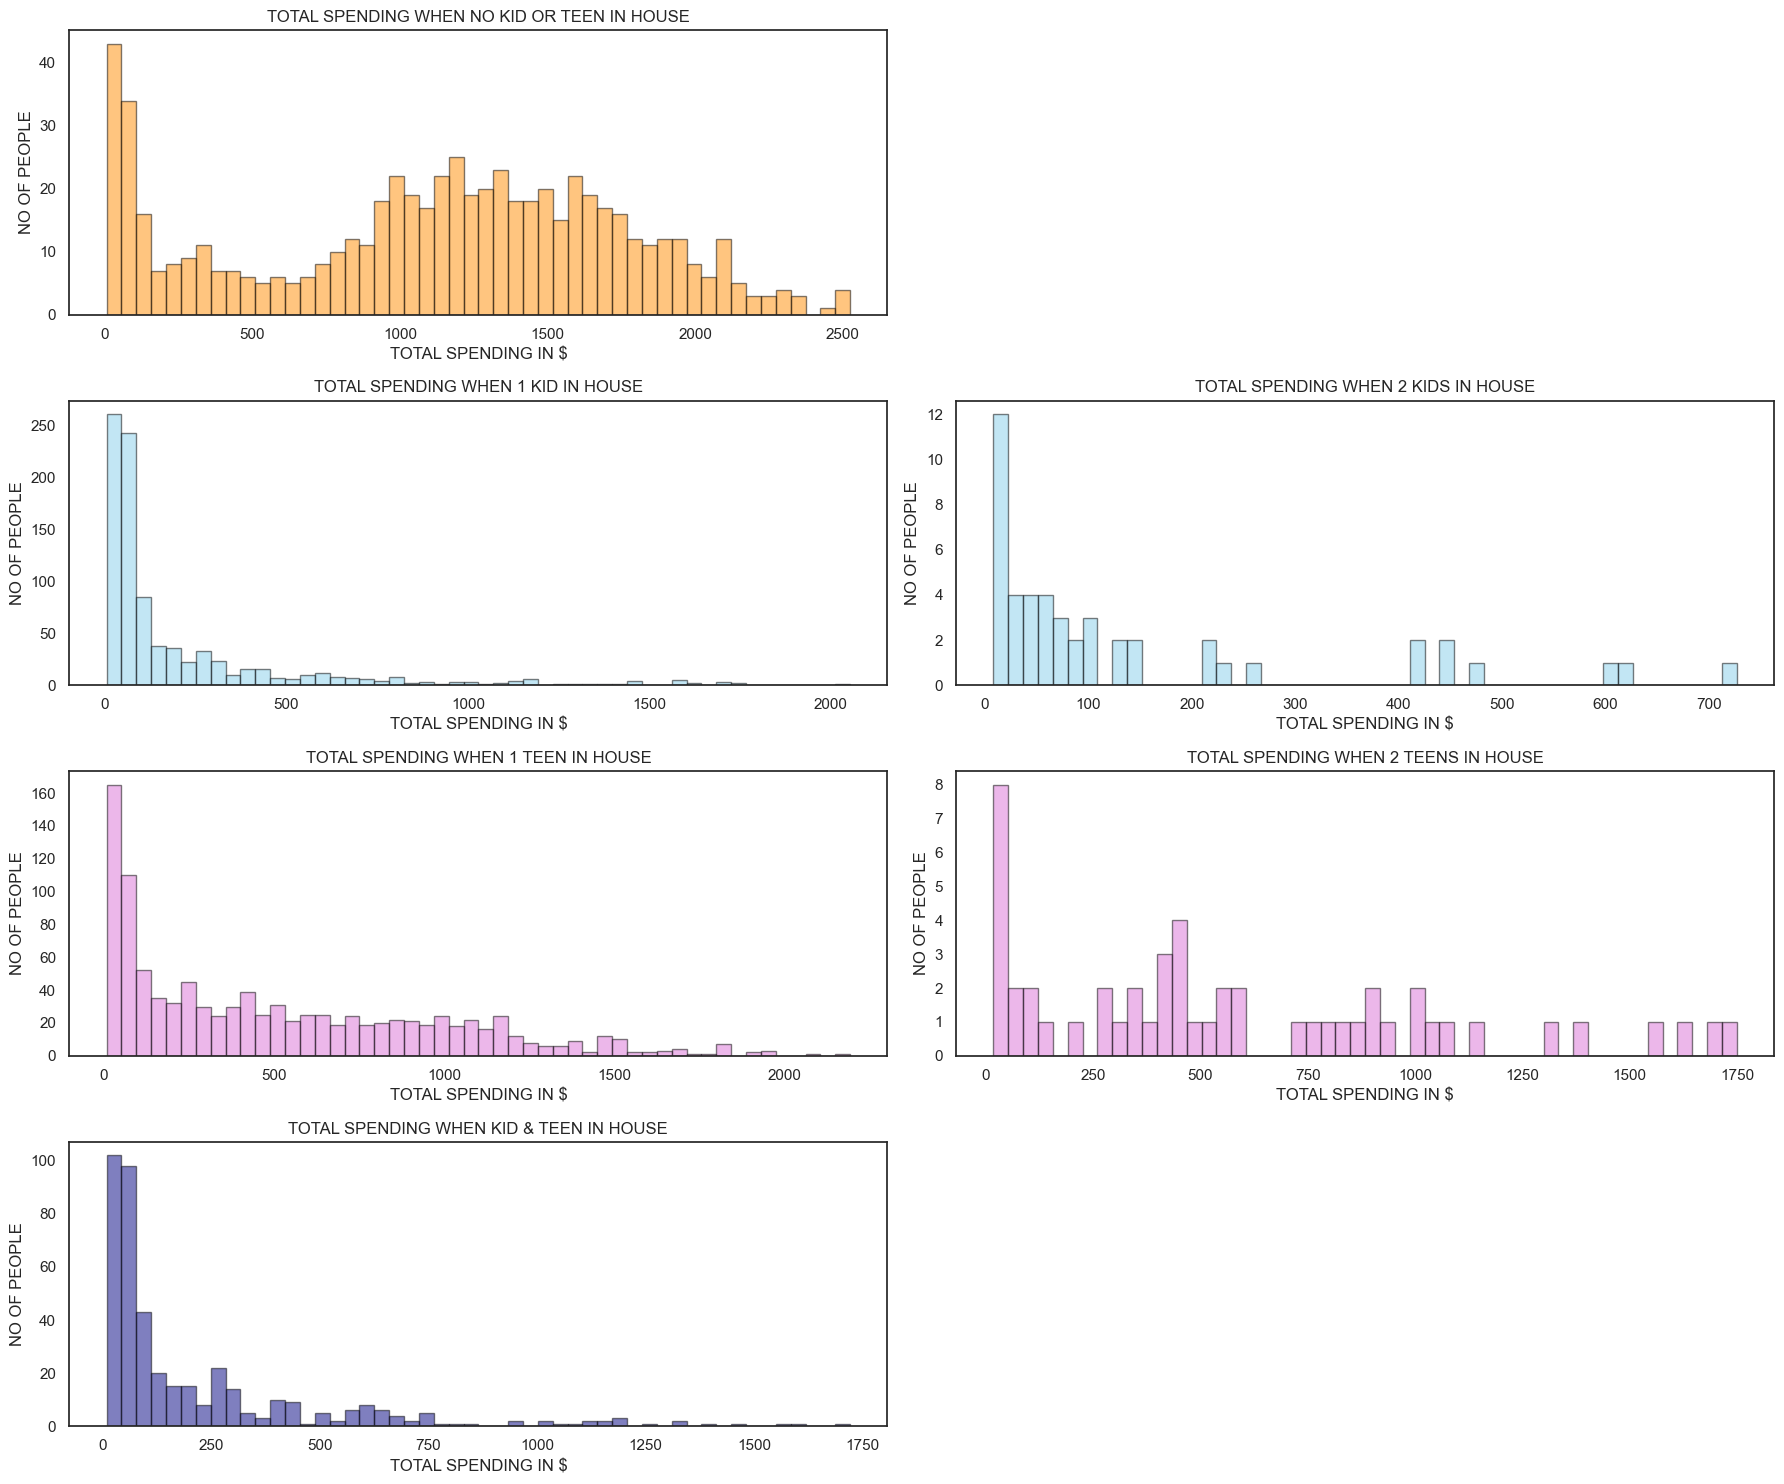

In [204]:
# Filter data to create different spending segments based on household composition
no_child = df[(df['Kidhome'] == 0) & (df['Teenhome'] == 0)]['Total_Spending']  # Households with no children
_1_kid = df[df['Kidhome'] == 1]['Total_Spending']  # Households with 1 kid
_2_kid = df[df['Kidhome'] == 2]['Total_Spending']  # Households with 2 kids
_1_teen = df[df['Teenhome'] == 1]['Total_Spending']  # Households with 1 teenager
_2_teen = df[df['Teenhome'] == 2]['Total_Spending']  # Households with 2 teenagers
kid_teen = df[(df['Kidhome'] > 0) & (df['Teenhome'] > 0)]['Total_Spending']  # Households with both kids and teenagers

# Create a figure with multiple subplots (4 rows, 2 columns)
fig, axis = plt.subplots(4, 2, figsize=(18, 15))

# Plot histogram for households with no children
axis[0, 0].hist(no_child, bins=50, color='darkorange', alpha=0.5, edgecolor='black')
axis[0, 0].set_title('TOTAL SPENDING WHEN NO KID OR TEEN IN HOUSE')
axis[0, 0].set_xlabel('TOTAL SPENDING IN $')
axis[0, 0].set_ylabel('NO OF PEOPLE')

# Plot histogram for households with 1 kid
axis[1, 0].hist(_1_kid, bins=50, color='skyblue', alpha=0.5, edgecolor='black')
axis[1, 0].set_title('TOTAL SPENDING WHEN 1 KID IN HOUSE')
axis[1, 0].set_xlabel('TOTAL SPENDING IN $')
axis[1, 0].set_ylabel('NO OF PEOPLE')

# Plot histogram for households with 2 kids
axis[1, 1].hist(_2_kid, bins=50, color='skyblue', alpha=0.5, edgecolor='black')
axis[1, 1].set_title('TOTAL SPENDING WHEN 2 KIDS IN HOUSE')
axis[1, 1].set_xlabel('TOTAL SPENDING IN $')
axis[1, 1].set_ylabel('NO OF PEOPLE')

# Plot histogram for households with 1 teenager
axis[2, 0].hist(_1_teen, bins=50, color='orchid', alpha=0.5, edgecolor='black')
axis[2, 0].set_title('TOTAL SPENDING WHEN 1 TEEN IN HOUSE')
axis[2, 0].set_xlabel('TOTAL SPENDING IN $')
axis[2, 0].set_ylabel('NO OF PEOPLE')

# Plot histogram for households with 2 teenagers
axis[2, 1].hist(_2_teen, bins=50, color='orchid', alpha=0.5, edgecolor='black')
axis[2, 1].set_title('TOTAL SPENDING WHEN 2 TEENS IN HOUSE')  
axis[2, 1].set_xlabel('TOTAL SPENDING IN $')
axis[2, 1].set_ylabel('NO OF PEOPLE')

# Plot histogram for households with both kids and teenagers
axis[3, 0].hist(kid_teen, bins=50, color='navy', alpha=0.5, edgecolor='black')
axis[3, 0].set_title('TOTAL SPENDING WHEN KID & TEEN IN HOUSE') 
axis[3, 0].set_xlabel('TOTAL SPENDING IN $')
axis[3, 0].set_ylabel('NO OF PEOPLE')

# Remove unused subplots
fig.delaxes(axis[3, 1])
fig.delaxes(axis[0, 1])

# Adjust spacing between subplots
plt.tight_layout()

We can deduce from the following graphs how overall spending changes when a child or teen lives at home.

- Graph 1 illustrates how people spend more money when no children are living at home.

- According to graph 2, most people spend less than \$500, and very few spend more than \$1000 when only one child is living at home. The maximum amount spent is less than \$750, with nearly 80% of people spending less than \$150 and very few spending more than \$200 when two children are living at home.

- As we can see from graph 3, half of the households with one teen spend less than \$500, while the other half spend generously. The cash is thought to be well spent when there are two teenagers.

- Nearly 80% of persons in graph 4 who have children and teenagers living with them spend less than \$250, with a significant portion of people spending between \$500 and \$1,000. Few people spend more than \$1,000.


### Analyze the educational background of customers who lodged complaints in the last two years.

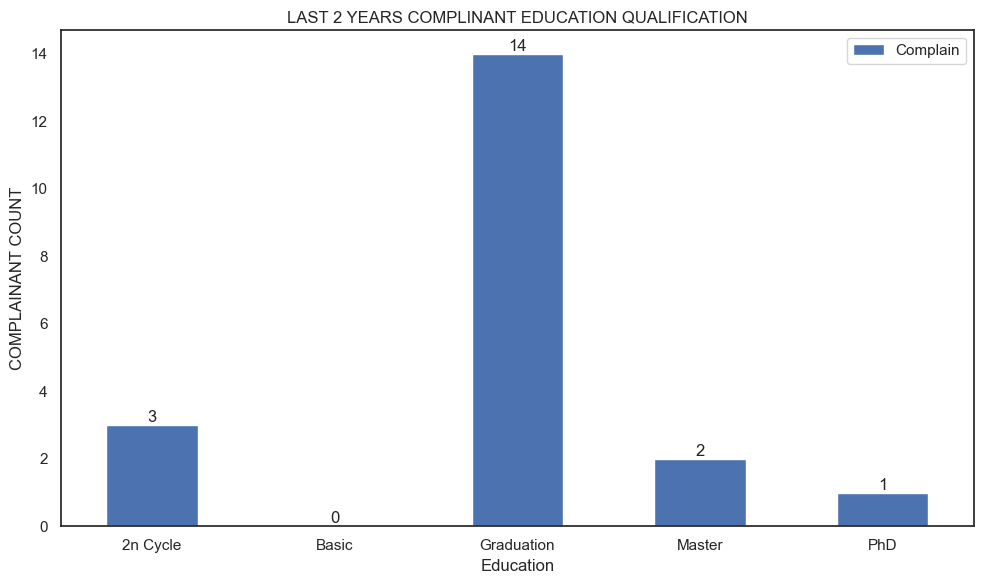

In [113]:
grouped = df.groupby('Education')[['Complain']].sum()

# Plot side-by-side bars
ax=grouped.plot(kind='bar', figsize=(10, 6))  
plt.title('LAST 2 YEARS COMPLINANT EDUCATION QUALIFICATION')
plt.ylabel('COMPLAINANT COUNT')
plt.xticks(rotation=0)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - Compared to consumers with other educational qualifications, those with a "graduation" qualification have recorded the highest number of complaints during the past two years.

# OVERALL REPORT

 - We can conclude that consumers spend the most money on wine and the least amount on sweets.

 - There are more teenagers than children. The number of children living in the family has a significant impact on the overall expenses. Spending decreases when a child is around, but increases when a teenager is present. People spend a lot of money if are no children living at home.

 - The majority of individuals in the sample have "Graduation" as their type of education.

 - Dataset encoding was confirmed for future machine learning. We used "Ordinal encoding" for the "Education column" and "One hot encoding" for the "Education, Marital_Status, Country" columns.

 - To swiftly spot trends, correlations, and patterns in your data, a heat map was created.

 - The largest demographic in the dataset was older individuals (those over 50). Instead of using any other kind of purchasing method, the elderly preferred to buy from physical stores. Stores are a better place to run campaigns targeting senior citizens.

 - People with kids at home tend to favor online shopping slightly more than in-store shopping because it's challenging to manage a child in a store. Also, they have a strong preference for deal purchases.

 - People are currently distributed about evenly between websites, stores, and deals. But online shopping will become more common in a few years. It is preferable to conduct campaigns based on that.

 - In terms of buying volume, Spain leads the dataset, whereas ME is at the bottom. This is because there are more than a thousand Spaniards, yet there are only three in ME. Other nations, however, have less than 150. Thus, we are unable to make any decisions based on nationality.

 - The majority of complaints during the past two years were reported by those with "Graduation" as their education category.